In [90]:
import numpy as np
import pandas as pd
from datetime import timedelta
from sklearn.feature_selection import mutual_info_regression
import plotly.express as px
from simplify_deployment.organism import Organism
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression
import plotly.express as px
from datetime import datetime, timedelta

<Axes: >

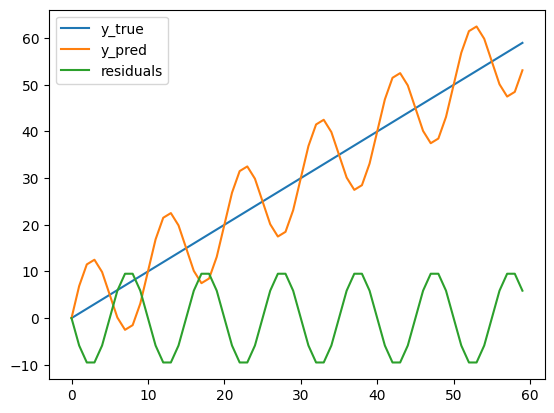

In [91]:
df = pd.DataFrame(
    {
        "y_true": range(60),
        "y_pred": np.arange(0,60) + np.sin(2*np.pi/10*np.arange(0,60,1))*10,
    },    
)
df["residuals"] = df["y_true"] - df["y_pred"]

df.plot()

In [92]:
mi_dict = {
    "lag":[],
    "mi": []
}
for lag in range(30):
    Xy = pd.concat(
        [
            df[["residuals"]].shift(lag).add_suffix(f"_lag_{lag}"),
            df[["residuals"]],
        ],
        axis = 1,
        ignore_index=False,
    ).dropna()
    mi = mutual_info_regression(
        X=Xy.iloc[:,[0]],
        y=Xy.iloc[:,1]        
    )[0]
    mi_dict["lag"].append(lag)
    mi_dict["mi"].append(mi)
    
mi_df = pd.DataFrame(mi_dict)
mi_df

,lag,mi
0,0,1.678653
1,1,0.875750
2,2,0.844632
3,3,0.883390
4,4,0.777325
5,5,1.746765
6,6,0.987208
7,7,0.874514
8,8,0.899895
9,9,0.967350


In [93]:
fig = px.scatter(
    mi_df,
    x = "lag",
    y = "mi",
)
fig.show()

In [94]:
si_df = pd.DataFrame(
    index = pd.date_range(start = datetime(2024,1,1,12,0,0),end = datetime(2024,1,2,12,0,0),freq="1min")
)
si_df["si_cumulative"] = np.random.randint(-100,100,size = si_df.shape[0])

si_df

,si_cumulative
2024-01-01 12:00:00,-30
2024-01-01 12:01:00,-78
2024-01-01 12:02:00,20
2024-01-01 12:03:00,-74
2024-01-01 12:04:00,86
...,...
2024-01-02 11:56:00,75
2024-01-02 11:57:00,-71
2024-01-02 11:58:00,41
2024-01-02 11:59:00,19


In [95]:
si_df = pd.merge(
    si_df,
    si_df.groupby(si_df.index.floor("15min")).tail(1).squeeze().rename("target").to_frame().shift(freq = timedelta(minutes = -15)),
    left_index = True,
    right_index = True,
    how = "left"
).bfill().dropna()
si_df["prediction"] = np.random.randint(-100,100,size = si_df.shape[0])
si_df["residuals"] = si_df["target"] - si_df["prediction"]
si_df

,si_cumulative,target,prediction,residuals
2024-01-01 12:00:00,-30,97.0,-64,161.0
2024-01-01 12:01:00,-78,97.0,21,76.0
2024-01-01 12:02:00,20,97.0,-38,135.0
2024-01-01 12:03:00,-74,97.0,-68,165.0
2024-01-01 12:04:00,86,97.0,-49,146.0
...,...,...,...,...
2024-01-02 11:41:00,-10,19.0,-18,37.0
2024-01-02 11:42:00,-95,19.0,-49,68.0
2024-01-02 11:43:00,-58,19.0,-7,26.0
2024-01-02 11:44:00,-19,19.0,-62,81.0
